## Classification of 3 types or classes
#### 0- Non-neoplastic,
#### 1- Neoplastic
#### 2- Normal

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
model_features = pd.read_csv("ihc-files/ihc-nnn-features.csv")
model_features

,Ki67,braf,PDL epitel,PDL lenfos,vegf,cd34,cd34 score,P53
0,50,Negative,Negative,Negative,20,47,2,15
1,40,Negative,Negative,Negative,30,39,2,10
2,50,Negative,Negative,Negative,50,50,3,20
3,50,Negative,Negative,Weak,40,63,3,5
4,60,Negative,Negative,Weak,70,57,2,25
...,...,...,...,...,...,...,...,...
366,70,Negative,Negative,Negative,10,30,1,40
367,75,Negative,Negative,Intermediate,55,37,2,30
368,80,Negative,Negative,Weak,60,40,2,35
369,70,Negative,Negative,Intermediate,50,36,2,35


In [3]:
labels_df = pd.read_csv("ihc-files/ihc-nnn-labels.csv")
labels_df

,Type
0,nonneoplastic
1,nonneoplastic
2,nonneoplastic
3,nonneoplastic
4,neoplastic
...,...
366,neoplastic
367,neoplastic
368,neoplastic
369,neoplastic


In [4]:
target_names = list(labels_df.Type)
target = []
for i in target_names:
    if i == 'nonneoplastic':
        target.append(0)
    elif i == "neoplastic":
        target.append(1)
    else:
        target.append(2)

In [5]:
len(target)

371

In [6]:
labels_df["Target"] = target
labels_df

,Type,Target
0,nonneoplastic,0
1,nonneoplastic,0
2,nonneoplastic,0
3,nonneoplastic,0
4,neoplastic,1
...,...,...
366,neoplastic,1
367,neoplastic,1
368,neoplastic,1
369,neoplastic,1


In [7]:
dummies = pd.get_dummies(model_features[["braf", "PDL epitel", "PDL lenfos"]], drop_first=True)
dummies 

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli
0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
366,0,0,1,0,0,1,0,0
367,0,0,1,0,0,0,0,0
368,0,0,1,0,0,0,1,0
369,0,0,1,0,0,0,0,0


In [8]:
dummies["Ki67"] = model_features.Ki67
dummies["vegf"] = model_features.vegf
dummies["cd34"] = model_features.cd34
dummies["cd34 score"] = model_features["cd34 score"]
dummies["P53"] = model_features.P53
dummies

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli,Ki67,vegf,cd34,cd34 score,P53
0,0,0,1,0,0,1,0,0,50,20,47,2,15
1,0,0,1,0,0,1,0,0,40,30,39,2,10
2,0,0,1,0,0,1,0,0,50,50,50,3,20
3,0,0,1,0,0,0,1,0,50,40,63,3,5
4,0,0,1,0,0,0,1,0,60,70,57,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,0,1,0,0,1,0,0,70,10,30,1,40
367,0,0,1,0,0,0,0,0,75,55,37,2,30
368,0,0,1,0,0,0,1,0,80,60,40,2,35
369,0,0,1,0,0,0,0,0,70,50,36,2,35


In [9]:
dummies.isna().sum()

braf_Weak              0
braf_kuvvetli          0
PDL epitel_Negative    0
PDL epitel_Weak        0
PDL epitel_kuvvetli    0
PDL lenfos_Negative    0
PDL lenfos_Weak        0
PDL lenfos_kuvvetli    0
Ki67                   0
vegf                   0
cd34                   0
cd34 score             0
P53                    0
dtype: int64

In [10]:
X = dummies
y = labels_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
clf.score(X_train, y_train)

1.0

In [13]:
y_preds = clf.predict(X_test)
y_preds

array([2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0], dtype=int64)

### Cross validation 10 fold

In [15]:
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
clf_cv_score

array([0.68421053, 0.59459459, 0.78378378, 0.67567568, 0.83783784,
       0.75675676, 0.72972973, 0.89189189, 0.81081081, 0.86486486])

In [16]:
clf_cv_score.mean()

0.7630156472261735

In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        28
           1       0.85      0.97      0.90        34
           2       0.56      0.77      0.65        13

    accuracy                           0.76        75
   macro avg       0.73      0.75      0.72        75
weighted avg       0.77      0.76      0.75        75



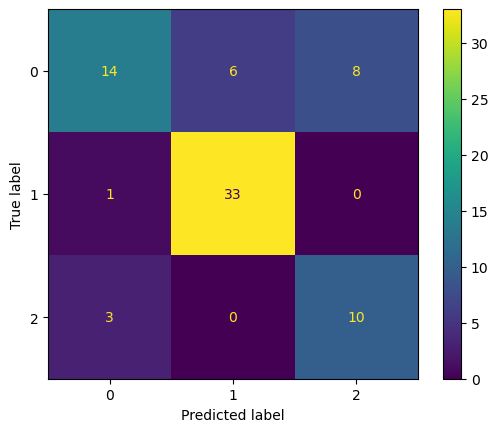

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()